# SED from DSPS spectra from calculating SFH with Diffstar

- adapted by SDC from https://github.com/ArgonneCPAC/dsps/blob/main/docs/source/dsps_quickstart.ipynb
-  CCIN2P3 on K80 GPU
- conda environnment : conda_jax0325
- creation date : 2023/09/26
- last update  : 2023/09/30

    pip install --upgrade  "jax[cuda11_cudnn82]"=='0.3.25' "jaxlib"=='0.3.25' -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
    python -m pip install "jax[cuda11_cudnn82]"  "jaxlib[cuda11_cudnn82]"

This notebook gives two basic illustrations of how to use diffstar to model the SFHs of individual and populations of galaxies.

### SFH of an individual diffstar galaxy

In the cell below, we'll grab the default diffmah and diffstar parameters, then we'l use the `sfh_singlegal` function to calculate the SFH.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (14,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'



## SFR with diffstar

In [2]:
import numpy as np
from diffstar.defaults import DEFAULT_MAH_PARAMS
from diffstar.defaults import DEFAULT_MS_PARAMS
from diffstar.defaults import DEFAULT_Q_PARAMS

today_gyr = 13.8 
tarr = np.linspace(0.1, today_gyr, 100)

2023-10-03 09:42:36.355576: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/nvptx_compiler.cc:497] The NVIDIA driver's CUDA version is 11.3 which is older than the ptxas CUDA version (11.4.152). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [3]:
print("SFR : 13 parameters")

SFR : 13 parameters


In [4]:
#mah_params = (lgm0, logtc, early_index, late_index)
print('MAH 4 params (lgm0, logtc, early_index, late_index) : ',DEFAULT_MAH_PARAMS)

MAH 4 params (lgm0, logtc, early_index, late_index) :  [12.    0.05  2.5   1.  ]


In [5]:
#ms_params = (lgmcrit, lgy_at_mcrit, indx_lo, indx_hi, tau_dep)
print('MS 5 params (lgmcrit, lgy_at_mcrit, indx_lo, indx_hi, tau_dep) : ' ,DEFAULT_MS_PARAMS)

MS 5 params (lgmcrit, lgy_at_mcrit, indx_lo, indx_hi, tau_dep) :  [12. -1.  1. -1.  2.]


In [6]:
# q_params (lg_qt, qlglgdt, lg_drop, lg_rejuv)
print('Q 4 params (lg_qt, qlglgdt, lg_drop, lg_rejuv) : ',DEFAULT_Q_PARAMS)

Q 4 params (lg_qt, qlglgdt, lg_drop, lg_rejuv) :  [ 1.       -0.50725  -1.01773  -0.212307]


#### sfh_singlegal

In [7]:
from diffstar import sfh_singlegal

sfh_gal = sfh_singlegal(
    tarr, DEFAULT_MAH_PARAMS, DEFAULT_MS_PARAMS, DEFAULT_Q_PARAMS)

In [8]:
sfh_singlegal?

Signature:     
sfh_singlegal(
    tarr,
    mah_params,
    ms_params,
    q_params,
    lgt0=1.1398790864012365,
    fb=0.156,
    ms_param_type='bounded',
    q_param_type='bounded',
)
Call signature: sfh_singlegal(*args, **kwargs)
Type:           CompiledFunction
String form:    <CompiledFunction of <function sfh_singlegal at 0x7fbb93f03d00>>
File:           /pbs/throng/lsst/users/dagoret/desc/JAX2023/miniconda3/envs/conda_jax0325_py310/lib/python3.10/site-packages/diffstar/sfh.py
Docstring:     
Calculate the star formation history of a single diffstar galaxy

Parameters
----------
tarr : ndarray, shape (n_t, )
    Age of the Universe in Gyr at which to compute the star formation history

mah_params : ndarray, shape (4, )
    mah_params = (lgm0, logtc, early_index, late_index)

ms_params : ndarray, shape (5, )
    By default the input ms_params will be interpreted as standard diffstar params:
        ms_params = (lgmcrit, lgy_at_mcrit, indx_lo, indx_hi, tau_dep)

    However, if m

### SFHs of a population of diffstar galaxies

For purposes of this toy demonstration, we'll first create a small diffstar population by randomly adding noise to the default diffstar parameters.

In [9]:
n_gals = 10

mah_params_galpop = np.tile(DEFAULT_MAH_PARAMS, n_gals)
mah_params_galpop = mah_params_galpop.reshape((n_gals, -1))

ms_params_galpop = np.tile(DEFAULT_MS_PARAMS, n_gals)
ms_params_galpop = ms_params_galpop.reshape((n_gals, -1))

q_params_galpop = np.tile(DEFAULT_Q_PARAMS, n_gals)
q_params_galpop = q_params_galpop.reshape((n_gals, -1))

ms_noise = np.random.normal(
    loc=0, scale=0.25, size=(n_gals, DEFAULT_MS_PARAMS.size))

ms_params_galpop = ms_params_galpop + ms_noise

q_noise = np.random.normal(
    loc=0, scale=0.1, size=(n_gals, DEFAULT_Q_PARAMS.size))

q_params_galpop = q_params_galpop + q_noise

In [10]:
print('MAH params (lgm0, logtc, early_index, late_index) : ')
print(mah_params_galpop)

MAH params (lgm0, logtc, early_index, late_index) : 
[[12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]
 [12.    0.05  2.5   1.  ]]


In [11]:
print('MS params (lgmcrit, lgy_at_mcrit, indx_lo, indx_hi, tau_dep) : ')
print(ms_params_galpop)

MS params (lgmcrit, lgy_at_mcrit, indx_lo, indx_hi, tau_dep) : 
[[11.72769527 -0.78503037  1.10599485 -1.03078541  2.04572634]
 [11.87057057 -1.0133905   0.89936045 -0.49106041  1.99385374]
 [12.1875954  -1.00873984  0.61998752 -0.8824372   2.17435509]
 [12.08499471 -0.87281307  1.25357027 -0.79532822  1.56904622]
 [12.17775308 -1.55272556  0.92563652 -0.6393444   1.87487553]
 [11.8521886  -1.05506748  1.21736239 -0.76374732  2.32850293]
 [11.62245385 -0.77031327  0.85035311 -1.54116117  1.93218126]
 [11.85776628 -1.02296787  1.25560282 -0.94914438  1.76769236]
 [12.20603664 -1.08814047  0.99808975 -1.11787051  1.94642175]
 [12.2148417  -1.59923921  0.81473104 -0.92001804  2.01005439]]


In [12]:
print('Q params (lg_qt, qlglgdt, lg_drop, lg_rejuv) : ')
print(q_params_galpop)

Q params (lg_qt, qlglgdt, lg_drop, lg_rejuv) : 
[[ 1.19421756 -0.62092147 -0.96890689 -0.13937494]
 [ 0.87369114 -0.52167672 -0.86633799 -0.14808674]
 [ 1.10526663 -0.41043771 -0.98200591 -0.34591587]
 [ 0.86769236 -0.38069404 -1.09892744 -0.10094006]
 [ 1.0214923  -0.44799483 -0.97102414 -0.20315876]
 [ 1.01301866 -0.5206936  -1.22667568 -0.17409345]
 [ 0.95375731 -0.40906047 -1.01648591 -0.23056867]
 [ 1.17826814 -0.49015685 -0.99907318 -0.17265168]
 [ 0.84423287 -0.33371682 -0.97961038 -0.08954339]
 [ 0.99473014 -0.37374975 -0.94619504 -0.21425189]]


#### sfh_galpop

The `sfh_galpop` calculates the SFH of an entire population at once. This calculation is vectorized with `jax.vmap` and so will be more efficient than a loop over successive calls to `sfh_singlegal`.

In [13]:
from diffstar import sfh_galpop

sfh_pop = sfh_galpop(
    tarr, mah_params_galpop, ms_params_galpop, q_params_galpop)

In [14]:
sfh_pop.shape

(10, 100)

Text(0.5, 1.0, 'Simulated Star Formation History (SFH) (log Y scale)')

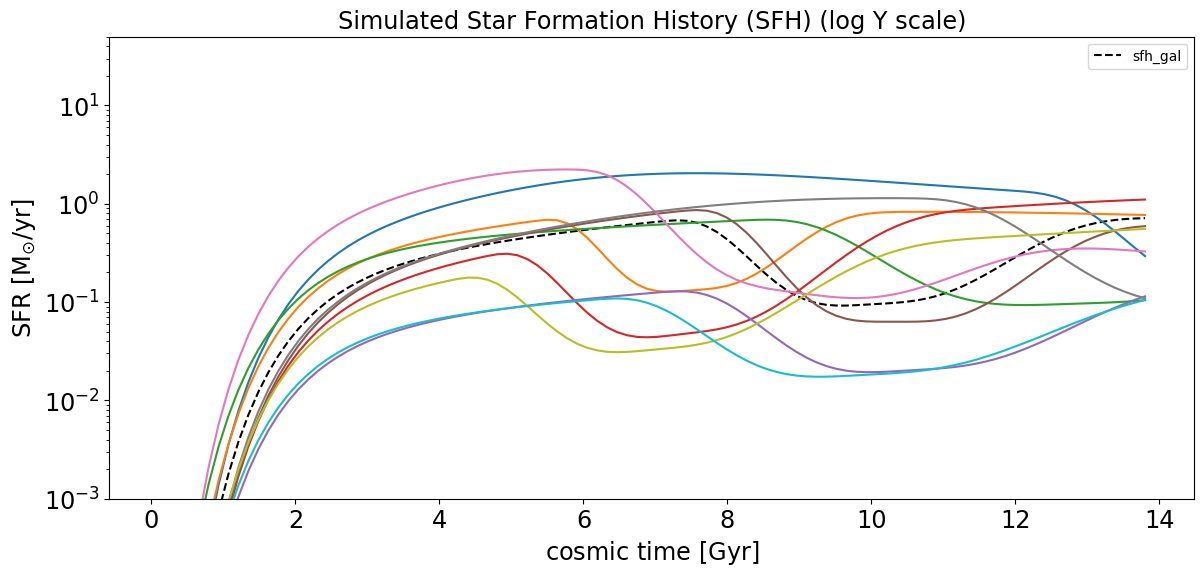

In [15]:


fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(1e-3, 50)
yscale = ax.set_yscale('log')

__=ax.plot(tarr, sfh_gal, '--', color='k',label='sfh_gal')

for igal in range(n_gals):
    __=ax.plot(tarr, sfh_pop[igal, :])


xlabel = ax.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$')
ylabel = ax.set_ylabel(r'${\rm SFR\ [M_{\odot}/yr]}$')
ax.legend()
ax.set_title("Simulated Star Formation History (SFH) (log Y scale)")

Text(0.5, 1.0, 'Simulated Star Formation History (SFH) (linear Y scale)')

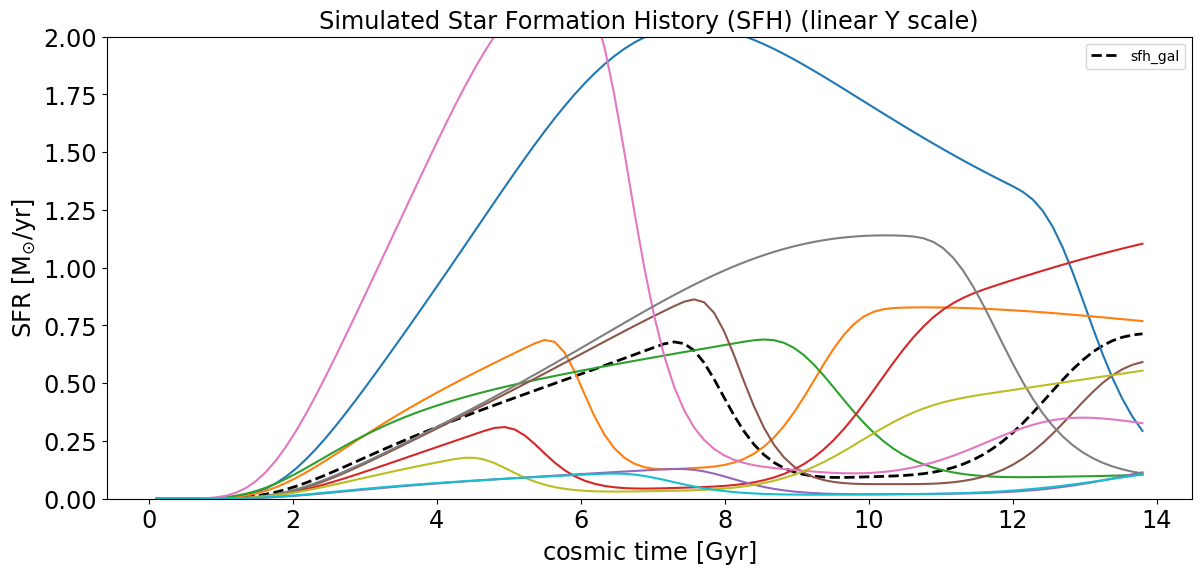

In [16]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(1e-3, 50)
#yscale = ax.set_yscale('log')

__=ax.plot(tarr, sfh_gal, '--', color='k',label='sfh_gal',lw=2)

for igal in range(n_gals):
    __=ax.plot(tarr, sfh_pop[igal, :])


xlabel = ax.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$')
ylabel = ax.set_ylabel(r'${\rm SFR\ [M_{\odot}/yr]}$')
ax.legend()
ax.set_ylim(0,2)

ax.set_title("Simulated Star Formation History (SFH) (linear Y scale)")

# SED with DSPS using previous SFR

In [17]:
import numpy as np
from diffstar.defaults import DEFAULT_MAH_PARAMS
from diffstar.defaults import DEFAULT_MS_PARAMS
from diffstar.defaults import DEFAULT_Q_PARAMS

today_gyr = 13.8 
#tarr = np.linspace(0.1, today_gyr, 100)

In [18]:
from dsps import load_ssp_templates
#ssp_data = load_ssp_templates(fn='tempdata_v2.h5')
ssp_data = load_ssp_templates(fn='tempdata.h5')

print(ssp_data._fields)

print('ssp_data : ssp_lgmet.shape = {}'.format(ssp_data.ssp_lgmet.shape))
print('ssp_data : ssp_lg_age_gyr.shape = {}'.format(ssp_data.ssp_lg_age_gyr.shape))
print('ssp_data : ssp_wave.shape = {}'.format(ssp_data.ssp_wave.shape))
print('ssp_data :ssp_flux.shape = {}'.format(ssp_data.ssp_flux.shape))

('ssp_lgmet', 'ssp_lg_age_gyr', 'ssp_wave', 'ssp_flux')
ssp_data : ssp_lgmet.shape = (12,)
ssp_data : ssp_lg_age_gyr.shape = (107,)
ssp_data : ssp_wave.shape = (5994,)
ssp_data :ssp_flux.shape = (12, 107, 5994)


In [19]:
import numpy as np
# table of ages in 100 bins in linear scale from 50 millions to 13.8 billions years
#gal_t_table = np.linspace(0.05, 13.8, 100) # age of the universe in Gyr
gal_t_table = tarr
# must put a true SFR using package diffstar
#gal_sfr_table = np.random.uniform(0, 10, gal_t_table.size) # SFR in Msun/yr
gal_sfr_table = sfh_gal
# metallicity
gal_lgmet = -2.0 # log10(Z)
gal_lgmet_scatter = 0.2 # lognormal scatter in the metallicity distribution function


In [20]:
from dsps.cosmology import age_at_z, DEFAULT_COSMOLOGY

print(DEFAULT_COSMOLOGY)

z_obs = 0.5
t_obs = age_at_z(z_obs, *DEFAULT_COSMOLOGY) # age of the universe in Gyr at z_obs
t_obs = t_obs[0] # age_at_z function returns an array, but SED functions accept a float for this argument

CosmoParams(Om0=0.3075, w0=-1.0, wa=0.0, h=0.6774)


In [21]:
from dsps import calc_rest_sed_sfh_table_lognormal_mdf
from dsps import calc_rest_sed_sfh_table_met_table

# calculate first SED with only one metallicity
print("gal_lgmet = ", gal_lgmet)

sed_info = calc_rest_sed_sfh_table_lognormal_mdf(
    gal_t_table, gal_sfr_table, gal_lgmet, gal_lgmet_scatter,
    ssp_data.ssp_lgmet, ssp_data.ssp_lg_age_gyr, ssp_data.ssp_flux, t_obs)

gal_lgmet =  -2.0


In [22]:
all_sed_info = []

for igal in range(n_gals):
   
    the_sed_info = calc_rest_sed_sfh_table_lognormal_mdf(gal_t_table, sfh_pop[igal, :], gal_lgmet, gal_lgmet_scatter,
    ssp_data.ssp_lgmet, ssp_data.ssp_lg_age_gyr, ssp_data.ssp_flux, t_obs)
    
    all_sed_info.append( the_sed_info)

Text(0.5, 1.0, 'SED $L_\\nu$ from the different SFH (log Y scale)')

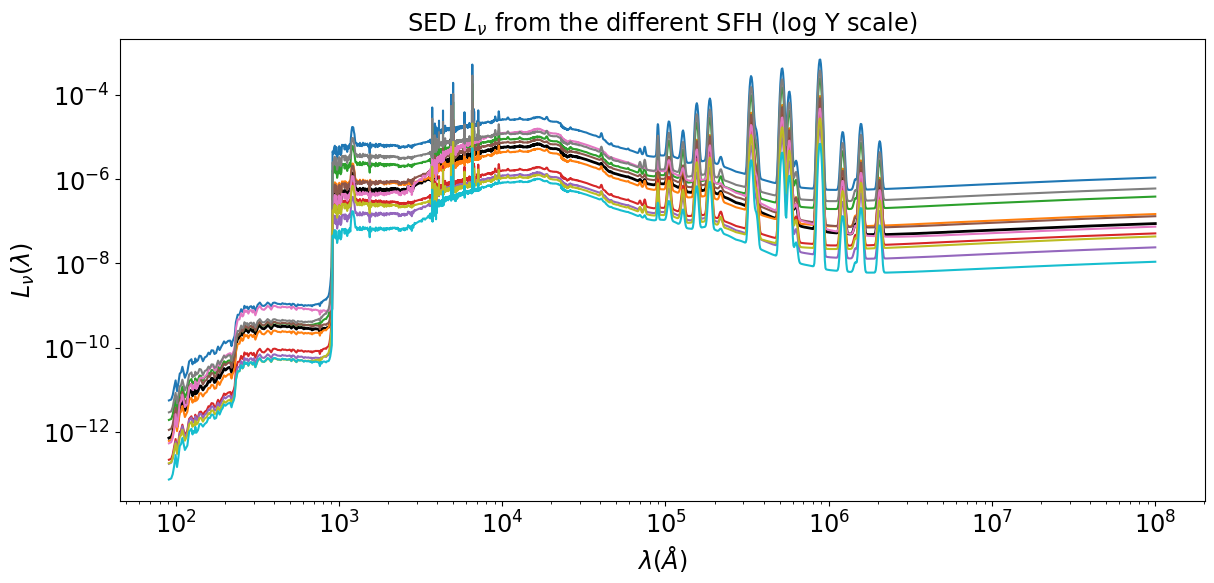

In [23]:
fig, ax = plt.subplots(1, 1)
__=ax.loglog()
__=ax.plot(ssp_data.ssp_wave, sed_info.rest_sed,'k-',lw=2)

for igal in range(n_gals):
    __=ax.plot(ssp_data.ssp_wave, all_sed_info[igal].rest_sed)
ax.set_xlabel("$\lambda (\\AA)$")
ax.set_ylabel("$L_\\nu(\lambda)$")
ax.set_title("SED $L_\\nu$ from the different SFH (log Y scale)")    

Text(0.5, 1.0, 'SED $L_\\nu$ from the different SFH (linear Y scale)')

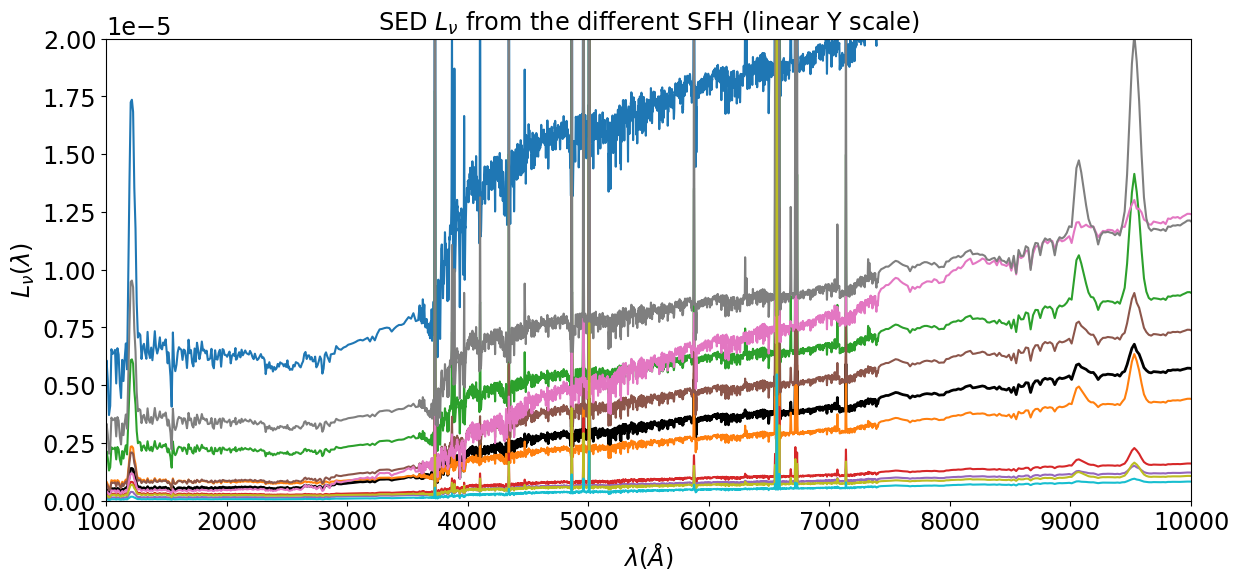

In [24]:
fig, ax = plt.subplots(1, 1)
#__=ax.loglog()
__=ax.plot(ssp_data.ssp_wave, sed_info.rest_sed,'k-',lw=2)

for igal in range(n_gals):
    __=ax.plot(ssp_data.ssp_wave, all_sed_info[igal].rest_sed)
ax.set_xlim(1000.,1e4)
ax.set_ylim(0.,0.2e-4)
ax.set_xlabel("$\lambda (\\AA)$")
ax.set_ylabel("$L_\\nu(\lambda)$")
ax.set_title("SED $L_\\nu$ from the different SFH (linear Y scale)")  

Text(0.5, 1.0, 'ratio of SED with different SFH by average parameter SED')

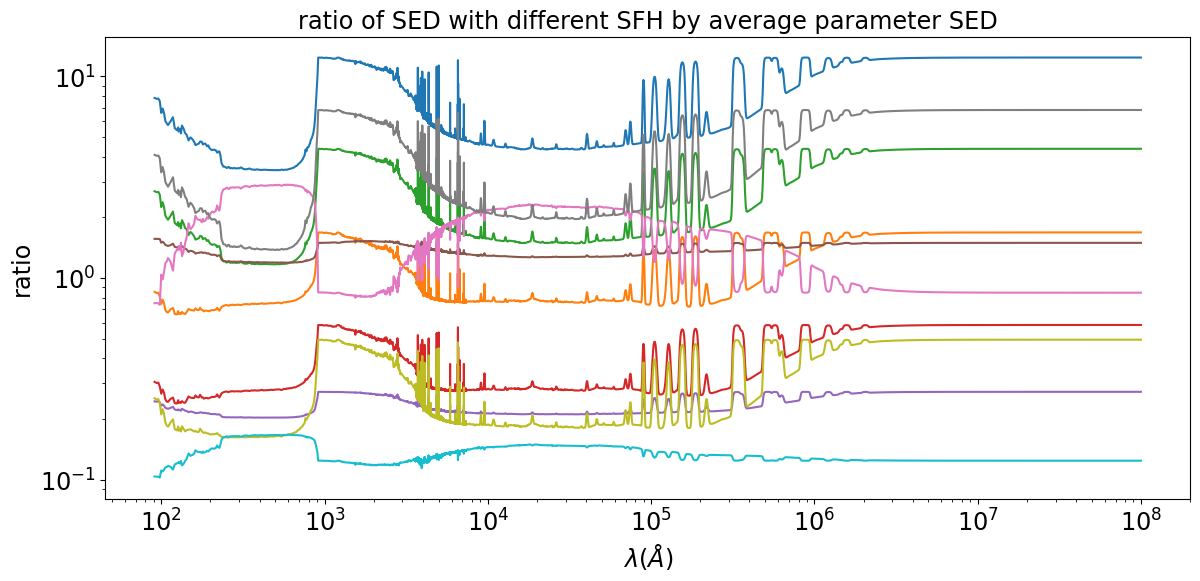

In [25]:
fig, ax = plt.subplots(1, 1)
__=ax.loglog()

for igal in range(n_gals):
    __=ax.plot(ssp_data.ssp_wave, all_sed_info[igal].rest_sed/ sed_info.rest_sed)
    
ax.set_xlabel("$\lambda (\\AA)$")
ax.set_ylabel("ratio")
ax.set_title("ratio of SED with different SFH by average parameter SED")

## Dust

In [26]:
from dsps.dust.att_curves import  sbl18_k_lambda, RV_C00,_frac_transmission_from_k_lambda

In [27]:
ssp_data.ssp_wave

array([9.100e+01, 9.400e+01, 9.600e+01, ..., 9.817e+07, 9.908e+07,
       1.000e+08])

In [28]:
wave_spec_micron = ssp_data.ssp_wave/10_000

In [29]:
Av= 1.0
uv_bump_ampl = 3.0
plaw_slope = -0.25

In [30]:
k = sbl18_k_lambda(wave_spec_micron,uv_bump_ampl,plaw_slope)
dsps_flux_ratio = _frac_transmission_from_k_lambda(k,Av)

In [31]:
sed_info.rest_sed.shape

(5994,)

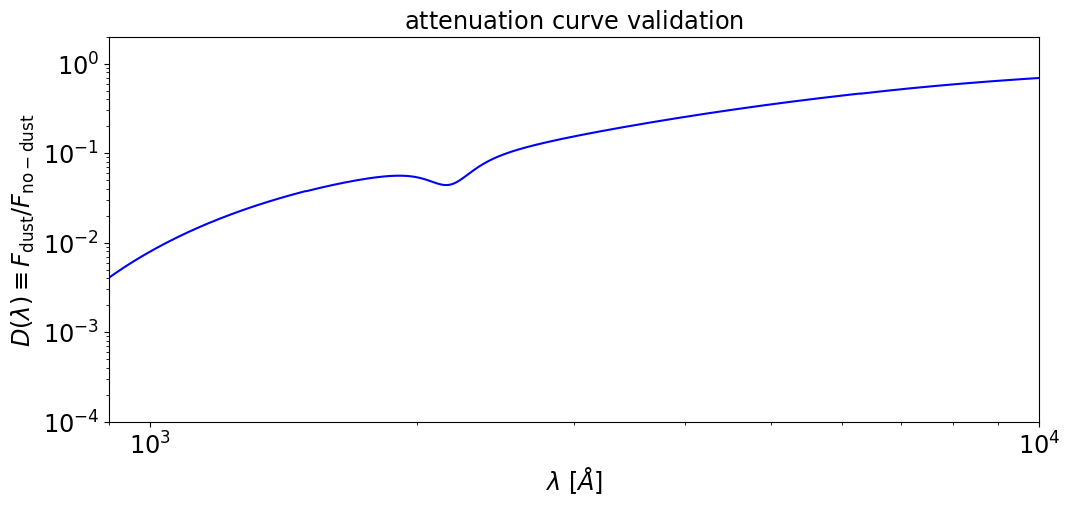

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
# fig.tight_layout(pad=3.0)


ax.plot(ssp_data.ssp_wave ,dsps_flux_ratio,'b-')

xlim = ax.set_xlim(900, 1e4)
ylim = ax.set_ylim(1e-4, 2)
__=ax.loglog()

title = ax.set_title(r'${\rm attenuation\ curve\ validation}$')
xlabel = ax.set_xlabel(r'$\lambda\ [\AA]$')
ylabel= ax.set_ylabel(r'$D(\lambda)\equiv F_{\rm dust}/F_{\rm no-dust}$')

Text(0.5, 1.0, 'Dust Attenuated SED $L_\\nu$ from the different SFH')

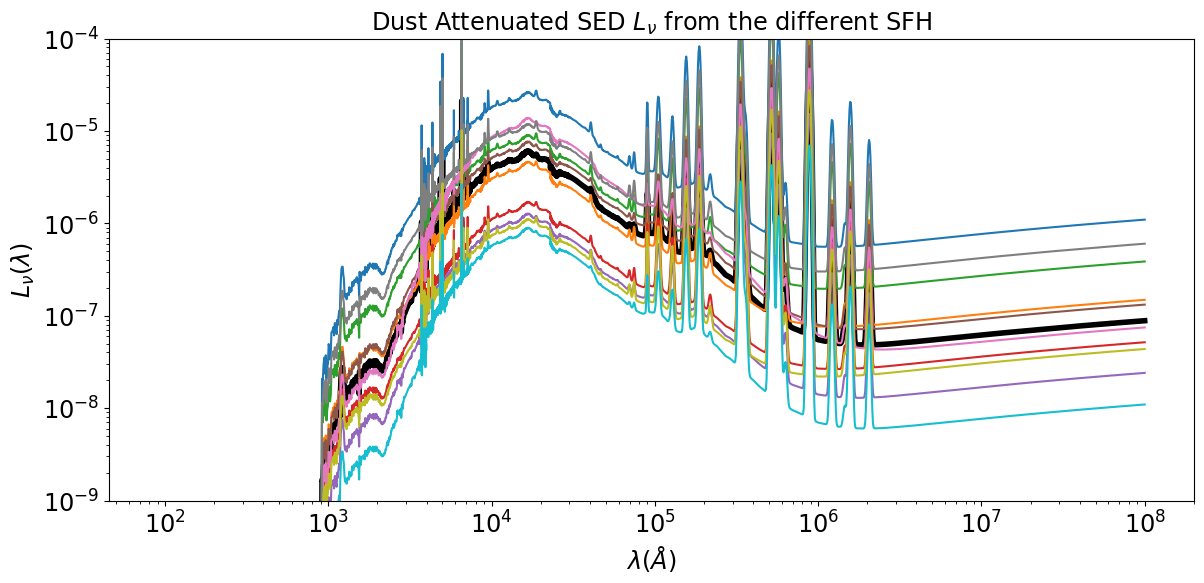

In [33]:
fig, ax = plt.subplots(1, 1)
__=ax.loglog()

flux_attenuated_fnu = sed_info.rest_sed * dsps_flux_ratio
__=ax.plot(ssp_data.ssp_wave, flux_attenuated_fnu,'k-',lw=4)

for igal in range(n_gals):
    flux_attenuated_fnu = all_sed_info[igal].rest_sed * dsps_flux_ratio
    __=ax.plot(ssp_data.ssp_wave,flux_attenuated_fnu )
ax.set_xlabel("$\lambda (\\AA)$")
ax.set_ylabel("$L_\\nu(\lambda)$")
 
ax.set_ylim(1e-9,1e-4)
ax.set_title("Dust Attenuated SED $L_\\nu$ from the different SFH")

In [34]:
C = 3e18 # Angstrom per second 

Text(0.5, 1.0, 'Dust Attenuated SED $L_\\lambda$ from the different SFH')

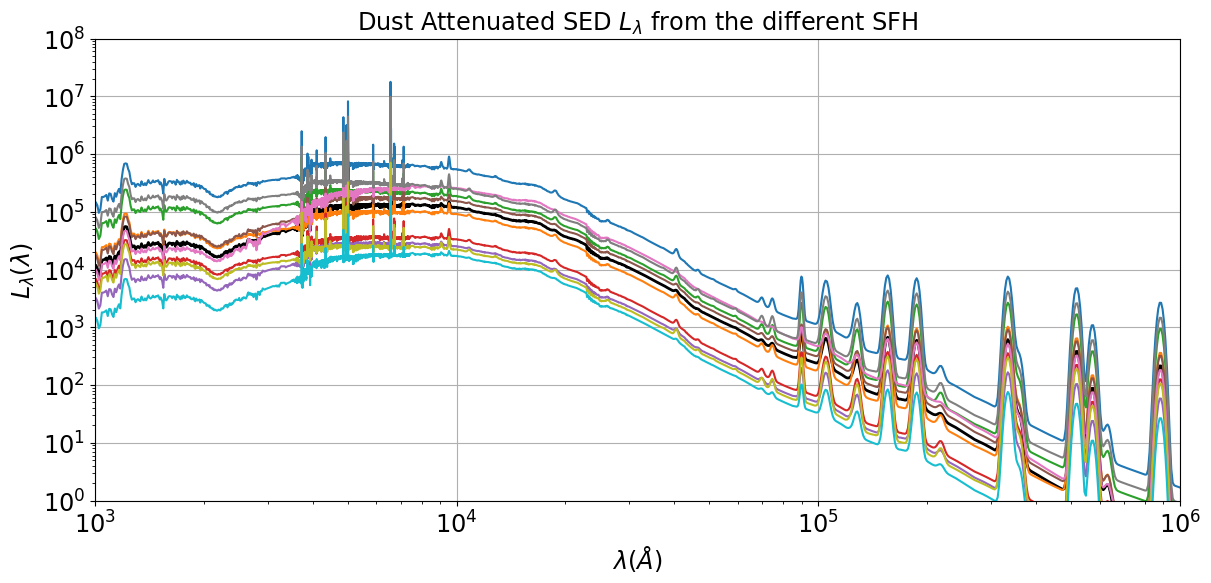

In [35]:
fig, ax = plt.subplots(1, 1)
__=ax.loglog()

flux_attenuated_nu = sed_info.rest_sed * dsps_flux_ratio
flux_attenuated_lambda = flux_attenuated_nu/ssp_data.ssp_wave**2*C

__=ax.plot(ssp_data.ssp_wave, flux_attenuated_lambda,'k-',lw=2)

for igal in range(n_gals):
    flux_attenuated_nu = all_sed_info[igal].rest_sed * dsps_flux_ratio
    flux_attenuated_lambda = flux_attenuated_nu/ssp_data.ssp_wave**2*C
    __=ax.plot(ssp_data.ssp_wave,flux_attenuated_lambda )
ax.set_xlabel("$\lambda (\\AA)$")
ax.set_ylabel("$L_\\lambda(\lambda)$")
 
ax.set_ylim(1,1e8)
ax.set_xlim(1e3,1e6)
ax.grid()
ax.set_title("Dust Attenuated SED $L_\\lambda$ from the different SFH")